          
## I. Debruitage par filtre lineaire

           1. Notion de bruit dans une image
               1.2 simulation d'un bruit gaussien
               1.3 bruit sel poivre 
           2.  NSR 
           
           3. Debruitage avec les filtres de convolutions (filtre lineaire)
              2.1 Filtre Moyenneur 
              2.2 Filtre gaussien et optimisation 
              
## II. Debruitage par filtre non lineaire          
           
           Filtre Median
           

### 1. Notion de bruit dans une image 

une image bruiter est tout simplement une image qui comporte des pertubations du a un effet .

mathematiquement si on note Ib Image bruiter I l''image original alors Ib= I + b 

1.2 simulation d'un bruit gaussien 

In [8]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import pi,exp
import statistics
from  math import  sqrt , log10
import random as rd
import math

#Convertion de l'image en niveau de gris avec pillow

imageReel=Image.open('lenna.jpg')
gray_imageReel=imageReel.convert('L')
gray_image_arrayReel=np.array(gray_imageReel)

#Simulation de loi gaussienne de moyenne 0 et de variance 1
def simulation():
    return rd.gauss(mu=0,sigma=1)  

#fonction  bruitGaussienne qui simule les bruits gaussienne dans l'image 

def bruitGaussienne(mat):

    valeurMax=np.max(mat)
    valeurMin=np.min(mat)

    for i in np.arange(0,np.shape(mat)[0]):

        for j in np.arange(0,np.shape(mat)[1]):

            bruit=valeurMax*simulation()
            

            if bruit>valeurMax:
                bruit=valeurMax
            elif bruit <valeurMin:
                bruit=valeurMin
            mat[i,j]=math.floor(mat[i,j]+bruit)

    return mat


In [9]:

#Fonction histogramme d'une image 

def Hist(gray_image_array):
    H=np.zeros(shape=(256,1))
    s=gray_image_array.shape

    for i in np.arange(s[0]):
        for j in np.arange(s[1]):
            k=gray_image_array[i,j]
            H[k,0]=H[k,0]+1
    return H



In [10]:
#Appel du fonction histogramme 
HistImageReel=Hist(gray_image_arrayReel)


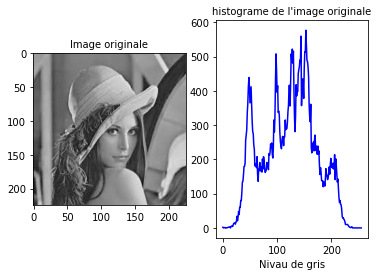

In [11]:
#Appel de la foncion 
plt.subplot(1,2,1)
plt.imshow(gray_image_arrayReel,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image originale",fontsize=10)

#Histogramme 
plt.subplot(1,2,2)

plt.plot(HistImageReel,color="blue")
    
plt.title("histograme de l'image originale",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)


In [12]:
#Appel de la fonction bruitGaussienne
LennabruiterG=bruitGaussienne(mat=gray_image_arrayReel)
LennabruiterG=LennabruiterG.astype(int)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars


In [13]:
#Appel du fonction histogramme 

HistImagebruiter=Hist(LennabruiterG)

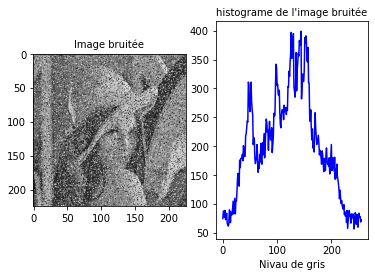

In [14]:

plt.subplot(1,2,1)

plt.imshow(LennabruiterG,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image bruitée",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagebruiter,color="blue")
    
plt.title("histograme de l'image bruitée",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)

1.3 bruit sel poivre

In [15]:
#Convertion de l'image en niveau de gris avec pillow

imageReel2=Image.open('lenna.jpg')
gray_imageReel2=imageReel2.convert('L')
gray_image_arrayReel2=np.array(gray_imageReel2)
HistImageReel2=Hist(gray_image_arrayReel2)

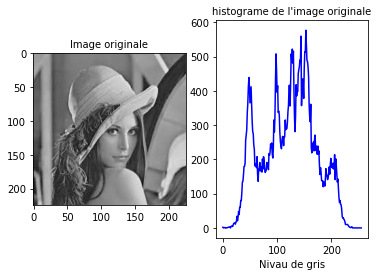

In [16]:

#Appel de la foncion 
plt.subplot(1,2,1)
plt.imshow(gray_image_arrayReel2,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image originale",fontsize=10)

plt.subplot(1,2,2)
plt.plot(HistImageReel2,color="blue")
    
plt.title("histograme de l'image originale",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

#plt.ylabel("nombre d'occurence",fontsize=10)



plt.show(block=True)



In [17]:
#fonction pour implementer le phenomene de bruit sel 

def simulationPoitSel():
    return rd.random()  

def bruitPointSel(mat):

    valeurMax=np.max(mat)

    for i in np.arange(0,np.shape(mat)[0]):

        for j in np.arange(0,np.shape(mat)[1]):

            bruit=100*simulationPoitSel()

            if bruit>valeurMax:
                bruit=valeurMax
            mat[i,j]=math.floor(mat[i,j]+bruit)

    return mat

#fonction pour implementer le phenomene de bruit poivre 

def simulationPointPoivre():
    return (-rd.random() ) 


def bruitPointpoivre(mat):

    valeurMin=np.min(mat)

    for i in np.arange(0,np.shape(mat)[0]):

        for j in np.arange(0,np.shape(mat)[1]):

            bruit=200*simulationPointPoivre()

            if bruit<valeurMin:
                bruit=valeurMin
            mat[i,j]=math.floor(mat[i,j]+bruit)

    return mat




In [18]:
#Appel des deux fonctions 

gray_image_arrayPointSel=bruitPointSel(mat=gray_image_arrayReel2)

imageBruitee2=bruitPointpoivre(mat=gray_image_arrayPointSel)

imageBruitee2=imageBruitee2.astype(int)

In [19]:
#Appel du fonction histogramme

HistImagebruitee2=Hist(imageBruitee2)

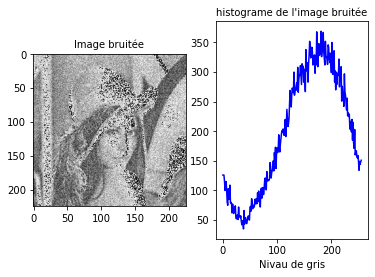

In [20]:
#Appel de la foncion 

#Histogramme 

plt.subplot(1,2,1)

plt.imshow(imageBruitee2,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image bruitée",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagebruitee2,color="blue")
    
plt.title("histograme de l'image bruitée",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)


### 2.  NSR

In [30]:
#Norme euclidienne 

def norme(u):

    somme=0
    
    for i in np.arange(0,np.shape(u)[0]):
        for j in np.arange(0,np.shape(u)[1]):

            t=int(u[i,j])

            somme = somme + (t**2)

    return sqrt(somme)
        

In [31]:
#SNR

def NSR(Ub,Ur):

    matrice_bruit=Ub-Ur #Ub=image bruitee et Ur image restauree

    NSR= 20*log10(norme(Ub)/norme(matrice_bruit))

    return NSR


### 2. Debruitage avec les filtres de convolutions (filtre lineaire)
        2.1 Filtre Moyenneur 

In [21]:

#Convertion de l'image en niveau de gris avec pillow

imageReel=Image.open('lenna.jpg')
gray_imageReel=imageReel.convert('L')
gray_image_arrayReel=np.array(gray_imageReel)

In [22]:
#Appel de la fonction bruitGaussienne

LennabruiterG=bruitGaussienne(mat=gray_image_arrayReel)
LennabruiterG=LennabruiterG.astype(int) #convertion d'une matrice de type flottant en entier

#Appel du fonction histogramme 

HistImagebruiter=Hist(LennabruiterG)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars


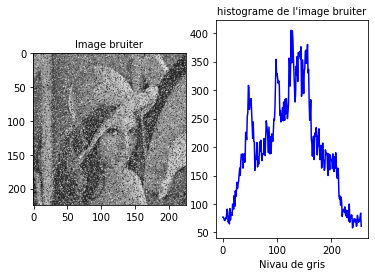

In [23]:
#image bruitee
plt.subplot(1,2,1)

plt.imshow(LennabruiterG,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image bruiter",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagebruiter,color="blue")
    
plt.title("histograme de l'image bruiter",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)

In [24]:
#fonction pour Redimentioner une matrice pour pouvoir utiliser le filtre 3*3  

def redimenssionner_matrice(matrice_initiale):
    dim=matrice_initiale.shape
    n_row=dim[0] 
    n_col=dim[1]
    while ((n_row % 3 )!=0):
        n_row=n_row-1
        n_col=n_col-1

    matrice_initiale=matrice_initiale[0:n_row,0:n_col]
    n_row_sur_dimenssionner=n_row+2
    n_col_sur_dimenssionner=n_col+2

    matrice_sur_dimenssionner=np.zeros((n_row_sur_dimenssionner,n_col_sur_dimenssionner))
    matrice_sur_dimenssionner[1:(n_row_sur_dimenssionner-1),1:(n_col_sur_dimenssionner-1)]=matrice_initiale[0:n_row,0:n_col]
    
    return matrice_sur_dimenssionner , matrice_initiale


In [25]:
#Appel de la fonction redimenssionner_matrice

matrice_redimenssionner=redimenssionner_matrice(matrice_initiale=LennabruiterG)



In [26]:
# fonction filtre_moyenne

def filtre_moyenne(matrice_redimenssionner):
    
    dim=matrice_redimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
 
    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            
            valeurDeConvolution=statistics.mean([matrice_redimenssionner[i-1,j-1],matrice_redimenssionner[i-1,j+1],matrice_redimenssionner[i,j-1],matrice_redimenssionner[i,j+1],matrice_redimenssionner[i+1,j-1],matrice_redimenssionner[i+1,j],matrice_redimenssionner[i+1,j+1],matrice_redimenssionner[i,j]])
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution
                



    return matrice_convoluer

In [27]:
matrice_filtrer=filtre_moyenne(matrice_redimenssionner=matrice_redimenssionner[0])
matrice_filtrer=matrice_filtrer.astype(int) #convertion d'une matrice de type flottant en entier 

In [28]:
#Appel du fonction histogramme

HistImagefiltree=Hist(matrice_filtrer)

le coefficient du rapport  Noise signal bruit est 9.051231615401088


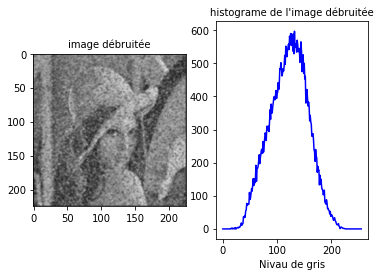

In [35]:
plt.subplot(1,2,1)

COEFMoyenne =NSR(Ub=matrice_redimenssionner[1],Ur=matrice_filtrer)

print("le coefficient du rapport  Noise signal bruit est {}".format(COEFMoyenne))

plt.imshow(matrice_filtrer,cmap='gray', vmin = 0, vmax = 256)
plt.title("image débruitée",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagefiltree,color="blue")
    
plt.title("histograme de l'image débruitée",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)


 2.2 Filtre gaussien et optimisation 

In [36]:

#Convertion de l'image en niveau de gris avec pillow

imageReel=Image.open('lenna.jpg')
gray_imageReel=imageReel.convert('L')
gray_image_arrayReel=np.array(gray_imageReel)


In [37]:
#Appel de la fonction bruitGaussienne

LennabruiterG=bruitGaussienne(mat=gray_image_arrayReel)
LennabruiterG=LennabruiterG.astype(int) #convertion d'une matrice de type flottant en entier

#Appel du fonction histogramme 

HistImagebruiter=Hist(LennabruiterG)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars


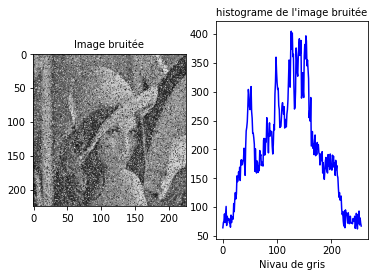

In [38]:
plt.subplot(1,2,1)

plt.imshow(LennabruiterG,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image bruitée",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagebruiter,color="blue")
    
plt.title("histograme de l'image bruitée",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)

In [39]:
matrice_redimenssionnerBruitGaussien=redimenssionner_matrice(matrice_initiale=LennabruiterG)


In [40]:
#Masque gaussienne 

def fonction_gaussien(x,y,sigma):

    return ((1/(2*pi*(sigma**2)))*exp(-(x**2+y**2)/(2*(sigma**2))))



In [41]:

def filtre_gaussien(matrice_sur_dimenssionner,sigma):
    
    dim=matrice_sur_dimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_convoluer=np.zeros((n_row,n_col))
    M=np.zeros((3,3))
    M_tild=np.zeros((3,3))

    M[0,0]=fonction_gaussien(x=-1,y=-1,sigma=sigma)
    M[0,1]=fonction_gaussien(x=0,y=-1,sigma=sigma)
    M[0,2]=fonction_gaussien(x=1,y=-1,sigma=sigma)

    M[1,0]=fonction_gaussien(x=-1,y=0,sigma=sigma)
    M[1,1]=fonction_gaussien(x=0,y=0,sigma=sigma)
    M[1,2]=fonction_gaussien(x=1,y=0,sigma=sigma)

    M[2,0]=fonction_gaussien(x=-1,y=1,sigma=sigma)
    M[2,1]=fonction_gaussien(x=0,y=1,sigma=sigma)
    M[2,2]=fonction_gaussien(x=1,y=1,sigma=sigma)

    M_tild[0,0]=M[2,2]
    M_tild[0,1]=M[2,1]
    M_tild[0,2]=M[2,0]

    M_tild[1,0]=M[1,2]
    M_tild[1,1]=M[1,1]
    M_tild[1,2]=M[1,0]

    M_tild[2,0]=M[0,2]
    M_tild[2,1]=M[0,1]
    M_tild[2,2]=M[0,0]

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            valeurDeConvolution=matrice_sur_dimenssionner[i-1,j-1]*M_tild[0,0]+matrice_sur_dimenssionner[i,j-1]*M_tild[1,0]+matrice_sur_dimenssionner[i,j+1]*M_tild[1,2]+matrice_sur_dimenssionner[i+1,j-1]*M_tild[2,0]+matrice_sur_dimenssionner[i+1,j]*M_tild[2,1]+ matrice_sur_dimenssionner[i+1,j+1]*M_tild[2,2]+matrice_sur_dimenssionner[i,j]*M_tild[1,1]
           
            if valeurDeConvolution > 255:
                
                matrice_convoluer[i-1,j-1]=255
            
            elif valeurDeConvolution < 0:
                matrice_convoluer[i-1,j-1]=0
            else:
                matrice_convoluer[i-1,j-1]=valeurDeConvolution
                
                


    return matrice_convoluer


In [44]:

vecteur_NSR=[]
vecteur_sigma=np.arange(-5.8,0,0.1) #pour avoir un bon resultat on prends sigma < 0

for sigma in vecteur_sigma:
    matrice_filtrer=filtre_gaussien(matrice_sur_dimenssionner=matrice_redimenssionnerBruitGaussien[0],sigma=sigma)
    matrice_filtrer=matrice_filtrer.astype(int) #convertion d'une matrice de type flottant en entier
    COEF =NSR(Ub=matrice_redimenssionnerBruitGaussien[1],Ur=matrice_filtrer)

    vecteur_NSR.append(COEF)


In [45]:

def optimisation(vecteur_NSR,sigma):
    eps=1
    dim=len(vecteur_NSR)
    sigma_optimiser=[]
    k=[]
    for i in np.arange(0,dim):
        if int(vecteur_NSR[i])==eps:
            k.append(i)
    for j in k:
        sigma_optimiser.append(sigma[j])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    return np.max(sigma_optimiser)



def optimisation1(vecteur_NSR,sigma):
    
    dim=len(vecteur_NSR)
    IndiceMax=np.argmax(vecteur_NSR)
    
    return sigma[IndiceMax]
    

In [46]:
#sigma=optimisation(vecteur_NSR=vecteur_NSR,sigma=vecteur_sigma)
#sigma=optimisation1(vecteur_NSR=vecteur_NSR,sigma=vecteur_sigma)
sigma=-0.8

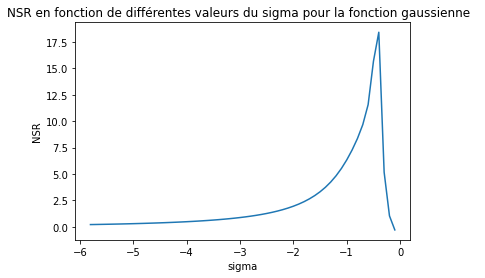

In [47]:
plt.plot(vecteur_sigma,vecteur_NSR)
plt.title("NSR en fonction de différentes valeurs du sigma pour la fonction gaussienne  ")
plt.xlabel("sigma")
plt.ylabel("NSR")

plt.show()

In [50]:

matrice_filtrer=filtre_gaussien(matrice_sur_dimenssionner=matrice_redimenssionnerBruitGaussien[0],sigma=sigma)
matrice_filtrer=matrice_filtrer.astype(int)

COEFGaussien =NSR(Ub=matrice_redimenssionnerBruitGaussien[1],Ur=matrice_filtrer)

In [51]:
#Appel du fonction histogramme 

HistImagefiltrer=Hist(matrice_filtrer)

le coefficient du rapport  Noise signal bruit est 8.360420046312111
 pour un sigma -0.8 


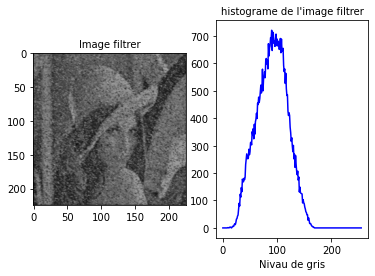

In [52]:
plt.subplot(1,2,1)
print("le coefficient du rapport  Noise signal bruit est {}\n pour un sigma {} ".format(COEFGaussien,sigma))

plt.imshow(matrice_filtrer,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image filtrer",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagefiltrer,color="blue")
    
plt.title("histograme de l'image filtrer",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.show(block=True)

## II. Debruitage par filtre non lineaire  

Filtre Median

In [53]:
#Convertion de l'image en niveau de gris avec pillow

imageReel=Image.open('lenna.jpg')
gray_imageReel=imageReel.convert('L')
gray_image_arrayReel=np.array(gray_imageReel)


In [54]:
#Appel de la fonction bruitGaussienne

LennabruiterG=bruitGaussienne(mat=gray_image_arrayReel)
LennabruiterG=LennabruiterG.astype(int) #convertion d'une matrice de type flottant en entier

#Appel du fonction histogramme 

HistImagebruiter=Hist(LennabruiterG)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars


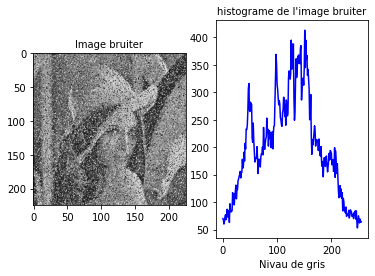

In [55]:
plt.subplot(1,2,1)

plt.imshow(LennabruiterG,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image bruiter",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagebruiter,color="blue")
    
plt.title("histograme de l'image bruiter",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

#plt.ylabel("nombre d'occurence",fontsize=10)

plt.show(block=True)

In [56]:

def redimenssionner_matrice(matrice_initiale):
    dim=matrice_initiale.shape
    n_row=dim[0] 
    n_col=dim[1]
    while ((n_row % 3 )!=0):
        n_row=n_row-1
        n_col=n_col-1

    matrice_initiale=matrice_initiale[0:n_row,0:n_col]
    n_row_sur_dimenssionner=n_row+2
    n_col_sur_dimenssionner=n_col+2

    matrice_sur_dimenssionner=np.zeros((n_row_sur_dimenssionner,n_col_sur_dimenssionner))
    matrice_sur_dimenssionner[1:(n_row_sur_dimenssionner-1),1:(n_col_sur_dimenssionner-1)]=matrice_initiale[0:n_row,0:n_col]
    
    return matrice_sur_dimenssionner , matrice_initiale


In [57]:
matrice_redimenssionnerMedianne=redimenssionner_matrice(matrice_initiale=LennabruiterG)


In [58]:

def filtre_medianne(matrice_redimenssionner):
    
    dim=matrice_redimenssionner.shape
    n_row=dim[0]-2
    n_col=dim[1]-2

    matrice_traiter=np.zeros((n_row,n_col))

    for i in np.arange(1,n_row+1):
        for j in np.arange(1,n_col+1):

            matrice_traiter[i-1,j-1]=statistics.median([matrice_redimenssionner[i-1,j-1],matrice_redimenssionner[i-1,j+1],matrice_redimenssionner[i,j-1],matrice_redimenssionner[i,j+1],matrice_redimenssionner[i+1,j-1],matrice_redimenssionner[i+1,j],matrice_redimenssionner[i+1,j+1],matrice_redimenssionner[i,j]])


    return matrice_traiter


In [61]:
lenna_filtrer=filtre_medianne(matrice_redimenssionner=matrice_redimenssionnerMedianne[0])
lenna_filtrer=lenna_filtrer.astype(int)

COEFMedianne =NSR(Ub=matrice_redimenssionnerMedianne[1],Ur=lenna_filtrer)


In [62]:
#Appel du fonction histogramme 

HistImagefiltrer=Hist(lenna_filtrer)

le coefficient du rapport  Noise signal bruit est 8.647049278172442


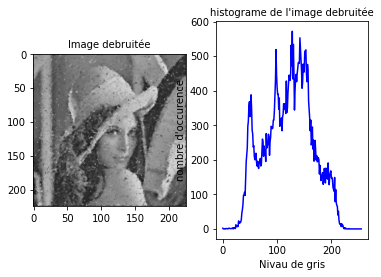

In [63]:
plt.subplot(1,2,1)
print("le coefficient du rapport  Noise signal bruit est {}".format(COEFMedianne))

plt.imshow(lenna_filtrer,cmap='gray', vmin = 0, vmax = 256)
plt.title("Image debruitée",fontsize=10)

#Histogramme 

plt.subplot(1,2,2)

plt.plot(HistImagefiltrer,color="blue")
    
plt.title("histograme de l'image debruitée",fontsize=10)

plt.xlabel("Nivau de gris",fontsize=10)

plt.ylabel("nombre d'occurence",fontsize=10)

plt.show(block=True)